# Tema 12: Differensiallikninger

## Newtons 2. lov

Vi kan forstå sammenhengen mellom akselerasjon, fart og posisjon ved å bruke kinematikklikningene for konstant akselerasjon og forenkle ved å la akselerasjonen være konstant i et svært lite tidsrom dt. Eller vi kan formulere Newtons 2. lov som en differensiallikning og simulere bevegelsen ved Eulers metode. Vi skal se at dette er en ekvivalent framgangsmåte!

In [8]:
# Startbetingelser og konstanter
v0 = 0   # startfart m/s
s0 = 20  # startposisjon m
t0 = 0   # starttid i s
dt = 1E-5   # tidssteg i s 

m = 1    # kg
g = 9.8  # tyngdeakselerasjon m/s^2
k = 0.5  # luftmotstandskoeffisienten

v = v0
s = s0
t = t0

while s >= 0:
    a = -g - k*v/m # Modell utleda fra N2
    v = v + a*dt   # Eulers metode (men også kinematikklikning!)
    s = s + v*dt   # Eulers metode
    t = t + dt
    
print("Ballen treffer bakken etter", t, "sekunder")

Ballen treffer bakken etter 2.425710000007424 sekunder


# Smittemodellering fortsettelse

- Ga en diskret smittemodellering noen urealistiske resultater?
- La oss se på en kontinuerlig modell der vi modellerer smitten ved hjelp av differensiallikninger.

$$S'(t) = -aS(t)\cdot I(t)$$
$$I'(t) = aS(t)\cdot I(t) - bI(t)$$
$$R'(t) = -bI(t)$$

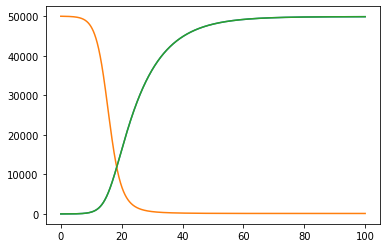

In [28]:
from pylab import *

# Konstanter og startbetingelser
N = 100000        # Antall mennesker
I0 = 15           # Antall smittede ved t0
S0 = (N - I0)*0.5 # Antall disponerte ved t0
R0 = 0            # Antall friskmeldte ved t0
a = 0.122/N*10
b = 0.1

I = I0
S = S0
R = R0

# Tidsparametre
dt = 1E-2
t0 = 0
t = 0
tid_slutt = 100 # dager
n = 0

# Lister
smittede = [I0]
mottakelige = [S0]
friske = [R0]
tid = [t0]

# Simuleringsløkke
while t <= tid_slutt:
    Sder = -a*S*I
    Ider = a*S*I - b*I
    Rder = b*I
    # Eulers metode
    S = S + Sder*dt
    I = I + Ider*dt
    R = R + Rder*dt
    t = t + dt
    smittede.append(I)
    mottakelige.append(S)
    friske.append(R)
    tid.append(t)
    n = n + 1
    
plot(tid, friske)
plot(tid, mottakelige)
plot(tid, friske)
show()


In [21]:
n

100000